In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen


import warnings
warnings.filterwarnings('ignore')

### 1. Import the dataset

In [ ]:
df = pd.read_csv('data_RBAC_final.csv')
print(df.shape)
df.head()
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

(50, 45)


,Year,Travel services (% of commercial service imports),Transport services (% of commercial service imports),Merchandise imports (current US$),Fuel imports (% of merchandise imports),Food imports (% of merchandise imports),Agricultural raw materials imports (% of merchandise imports),Urban population,Rural population,"Population, total","Unemployment, total (% of total labor force) (national estimate)","Employment to population ratio, 15+, total (%) (national estimate)",Gross domestic income (constant LCU),"Inflation, GDP deflator (annual %)",Adjusted net national income per capita (current US$),Population density (people per sq. km of land area),CO2 emissions (% of total fuel combustion),Total greenhouse gas emissions (kt of CO2 equivalent),Energy use (kg of oil equivalent per capita),Electric power consumption (kWh per capita),Combustible renewables and waste (% of total energy),Fossil fuel energy consumption (% of total),Alternative and nuclear energy (% of total energy use),"Energy imports, net (% of energy use)",Renewable energy consumption (% of total final energy consumption),"Electricity production from renewable sources, excluding hydroelectric (% of total)",Renewable electricity output (% of total electricity output),Electricity production from oil sources (% of total),Electricity production from nuclear sources (% of total),Electricity from N.G sources (% of total),"Electricity from oil,gas,coal (% of total)",Electricity production from coal sources (% of total),U.S. Price of Natural Gas Sold to Commercial Consumers Dollars per Thousand Cubic Feet,U.S. Price of Natural Gas Delivered to Residential Consumers Dollars per Thousand Cubic Feet,Price of U.S. Natural Gas Exports ($/1000cf),Price of U.S. Natural Gas Imports ($/1000cf),N.G Wellhead Price ($/1000cf),U.S. N.G Residential Consumption (miilioncf),Underground N.G Storage (Billion Cubic feet),Heating Degree Days,Cooling Degree Days,GDP Per capita,Net primary income (Net income from abroad) (current US$)
0,1970,43.929360,44.481236,4.240000e+10,7.696144,16.124107,4.573803,150922373.0,54129627.0,205052000.0,4.9,57.400002,5.270000e+12,5.504166,4572.06092,22.388131,19.022318,5400503.50,7569.07660,9886.874908,2.259684,95.918771,1.810684,6.521610,2.185441,0.050311,9.357028,12.123966,1.436303,24.577389,83.088705,46.387350,0.77,1.09,4.499238,4.671424,0.17,4837432,4003.927,5218,1079,5234.296666,3.420000e+10
1,1971,43.700000,44.300000,4.830000e+10,8.153026,14.538367,4.418209,152865492.0,54795508.0,207661000.0,5.9,56.599998,5.430000e+12,5.069157,4889.74752,22.672989,19.061400,5440420.62,7644.52480,9971.031987,2.212156,95.643807,2.124913,9.515375,2.257342,0.049549,9.455183,13.819582,2.380678,23.493290,82.100882,44.788010,0.82,1.15,4.537536,4.702349,0.18,4971690,4324.916,5072,1036,5609.382600,3.290000e+10
2,1972,43.902439,44.425087,5.890000e+10,8.637003,13.680135,4.498348,154531732.0,55364268.0,209896000.0,5.6,57.000000,5.710000e+12,4.322763,5303.75967,22.917012,18.390586,5704297.25,7940.99783,10055.905410,2.211106,95.366758,2.382324,12.131813,2.331608,0.099292,9.554368,15.838073,3.123155,21.733998,82.138329,44.566257,0.88,1.21,4.576159,4.733478,0.19,5125982,4480.155,5251,989,6094.017990,3.650000e+10
3,1973,40.631888,47.759001,7.360000e+10,11.764483,13.757680,4.738632,156034954.0,55874046.0,211909000.0,4.9,57.799999,6.030000e+12,5.479884,5910.44370,23.136797,17.048219,5912971.38,8163.60379,10141.501280,2.167485,94.977189,2.784347,15.821800,2.408318,0.139811,9.654594,17.093791,4.536586,18.563639,81.821554,46.164123,0.94,1.29,4.615111,4.764814,0.22,4879387,4898.000,4764,1106,6726.358956,3.710000e+10
4,1974,38.210863,51.437700,1.100000e+11,25.125983,11.183999,3.552048,157488501.0,56365499.0,213854000.0,5.6,57.799999,5.960000e+12,8.998689,6151.69545,23.349158,16.687413,5756864.10,7909.58648,10227.825740,2.232786,94.156454,3.546220,15.551175,2.487552,0.146321,9.755870,16.450735,6.194698,17.496698,78.123929,44.176495,1.07,1.43,4.654395,4.796357,0.30,4786128,4962.000,4882,981,7225.691

In [ ]:
df = df.ffill(axis=0)

Alternative Fuel Prices (Coal,Petrol,Renewable) P 1
Population P 2
Economic Growth GDP( P) 3
Weather (Cooling and Heating Days) P 
Relative market share in power generation of natural gas and coal to the price ratio of natural gas to coal
Electricity Produced by natural gas
Industrial Production
GDP
Natural Gas Production Price
Natural gas imports
Natural gas exports
Natural gas underground storage
Amount of natural gas production
 Unemployment  Rate 
Inflation Rate


In [ ]:
df.columns

Index(['Year', 'Travel services (% of commercial service imports)',
       'Transport services (% of commercial service imports)',
       'Merchandise imports (current US$)',
       'Fuel imports (% of merchandise imports)',
       'Food imports (% of merchandise imports)',
       'Agricultural raw materials imports (% of merchandise imports)',
       'Urban population', 'Rural population', 'Population, total',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Employment to population ratio, 15+, total (%) (national estimate)',
       'Gross domestic income (constant LCU)',
       'Inflation, GDP deflator (annual %)',
       'Adjusted net national income per capita (current US$)',
       'Population density (people per sq. km of land area)',
       'CO2 emissions (% of total fuel combustion)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Energy use (kg of oil equivalent per capita)',
       'Electric power consumption (kWh per

In [ ]:
# df = df.drop(columns=['Unnamed: 0','Year', 'Urban population',
#  'Population, total',
#  'Gross domestic income (constant LCU)',
#  'Adjusted net national income per capita (current US$)',
#  'Population density (people per sq. km of land area)',
#  'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
#  'Electric power consumption (kWh per capita)',
#  'Fossil fuel energy consumption (% of total)',
#  'Alternative and nuclear energy (% of total energy use)',
#  'Renewable energy consumption (% of total final energy consumption)',
#  'Electricity production from nuclear sources (% of total)',
#  'Electricity production from oil, gas and coal sources (% of total)',
#  'U.S. Price of Natural Gas Delivered to Residential Consumers Dollars per Thousand Cubic Feet',
#  'Price of U.S. Natural Gas Imports  Dollars per Thousand Cubic Feet',
#  'U.S. Natural Gas Wellhead Price  Dollars per Thousand Cubic Feet'])
# df = df[['Travel services (% of commercial service imports)', 'Fuel imports (% of merchandise imports)', 
#          'Rural population', 'Inflation, GDP deflator (annual %)',
#        'Electricity production from coal sources (% of total)','U.S. Natural Gas Residential Consumption  Million Cubic Feet']]

In [ ]:
y=df["Year"]

In [ ]:
df=df[["Electric power consumption (kWh per capita)",
       #'Urban population',
       'Rural population',
   "CO2 emissions (% of total fuel combustion)",
       "Inflation, GDP deflator (annual %)",
       "Electricity from N.G sources (% of total)",
       'Underground N.G Storage (Billion Cubic feet)',
           # 'Heating Degree Days', 
       'Cooling Degree Days', 
    #'Price of U.S. Natural Gas Exports ($/1000cf)',
   'N.G Wellhead Price ($/1000cf)',
         'U.S. N.G Residential Consumption (miilioncf)',
       #'Alternative and nuclear energy (% of total energy use)',
        'Renewable energy consumption (% of total final energy consumption)',
       "GDP Per capita"]]

In [ ]:
y=

In [ ]:
df.shape

(50, 11)

### 2. Visualize the dataset

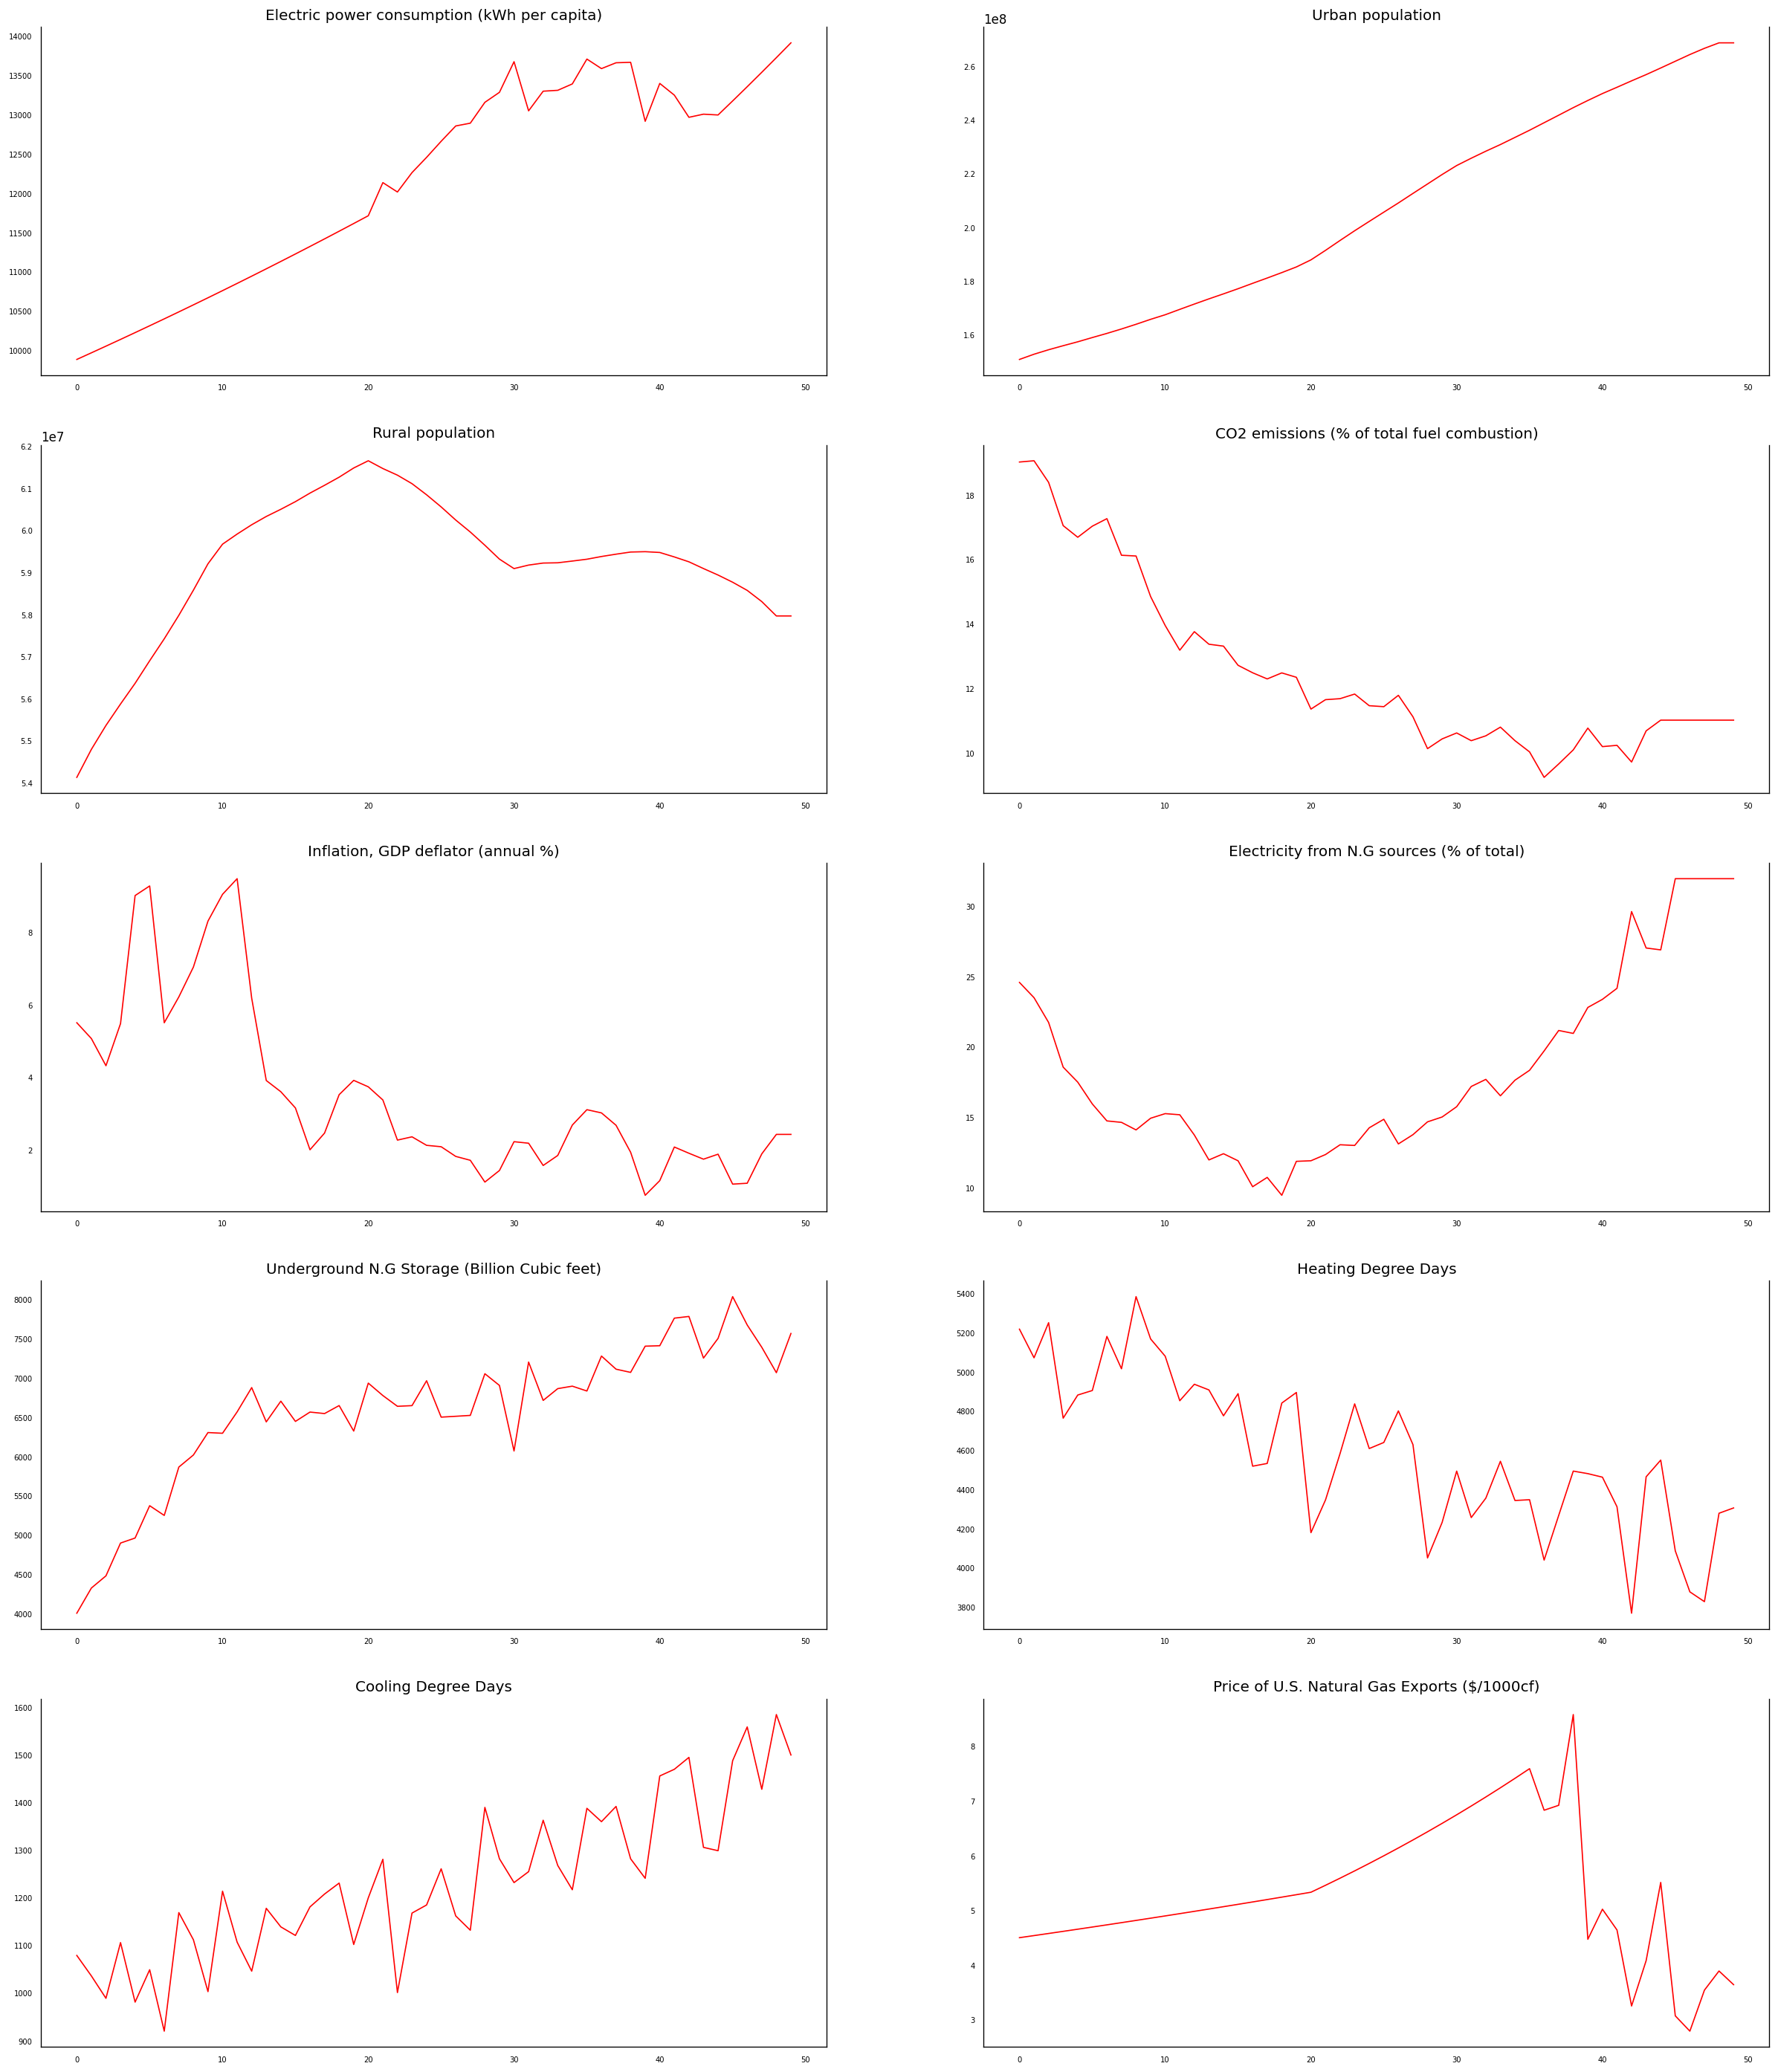

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(25,30))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

### 3. Testing Causality using granger's causality test

In [ ]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
grangers_causation_matrix(df, variables = df.columns)

,Electric power consumption (kWh per capita)_x,Urban population_x,Rural population_x,CO2 emissions (% of total fuel combustion)_x,"Inflation, GDP deflator (annual %)_x",Electricity from N.G sources (% of total)_x,Underground N.G Storage (Billion Cubic feet)_x,Heating Degree Days_x,Cooling Degree Days_x,Price of U.S. Natural Gas Exports ($/1000cf)_x,N.G Wellhead Price ($/1000cf)_x,U.S. N.G Residential Consumption (miilioncf)_x,Renewable energy consumption (% of total final energy consumption)_x,GDP Per capita_x
Electric power consumption (kWh per capita)_y,1.0000,0.0060,0.0000,0.0000,0.0111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Urban population_y,0.0000,1.0000,0.0000,0.0000,0.0003,0.0000,0.0006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Rural population_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
CO2 emissions (% of total fuel combustion)_y,0.0000,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0004,0.0001,0.0000,0.0000,0.0000,0.0434
"Inflation, GDP deflator (annual %)_y",0.0024,0.0001,0.0000,0.0000,1.0000,0.0000,0.0001,0.0000,0.0012,0.0001,0.0073,0.0000,0.0001,0.0000
Electricity from N.G sources (% of total)_y,0.0000,0.0000,0.0007,0.0000,0.0014,1.0000,0.0000,0.0000,0.0004,0.0000,0.0000,0.0000,0.0000,0.0000
Underground N.G Storage (Billion Cubic feet)_y,0.0000,0.0000,0.0024,0.0000,0.0861,0.0001,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Heating Degree Days_y,0.0000,0.0000,0.0288,0.0000,0.0002,0.0031,0.0001,1.0000,0.0148,0.0070,0.0031,0.0053,0.0004,0.0000
Cooling Degree Days_y,0.0000,0.0000,0.0000,0.0000,0.0013,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Price of U.S. Natural Gas Exports ($/1000cf)_y,0.0000,0.0000,0.0000,0.0000,0.0834,0.0009,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000,0.0000,0.0000


#### Result from Grainger's test

P value from all the combinations is less than 0.05 

In [ ]:
# df=df.drop(columns=["Electricity production from oil, gas and coal sources (% of total)"])

### 4. Cointegration test

In [ ]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]

    def adjust(val, length= 6): 
        return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


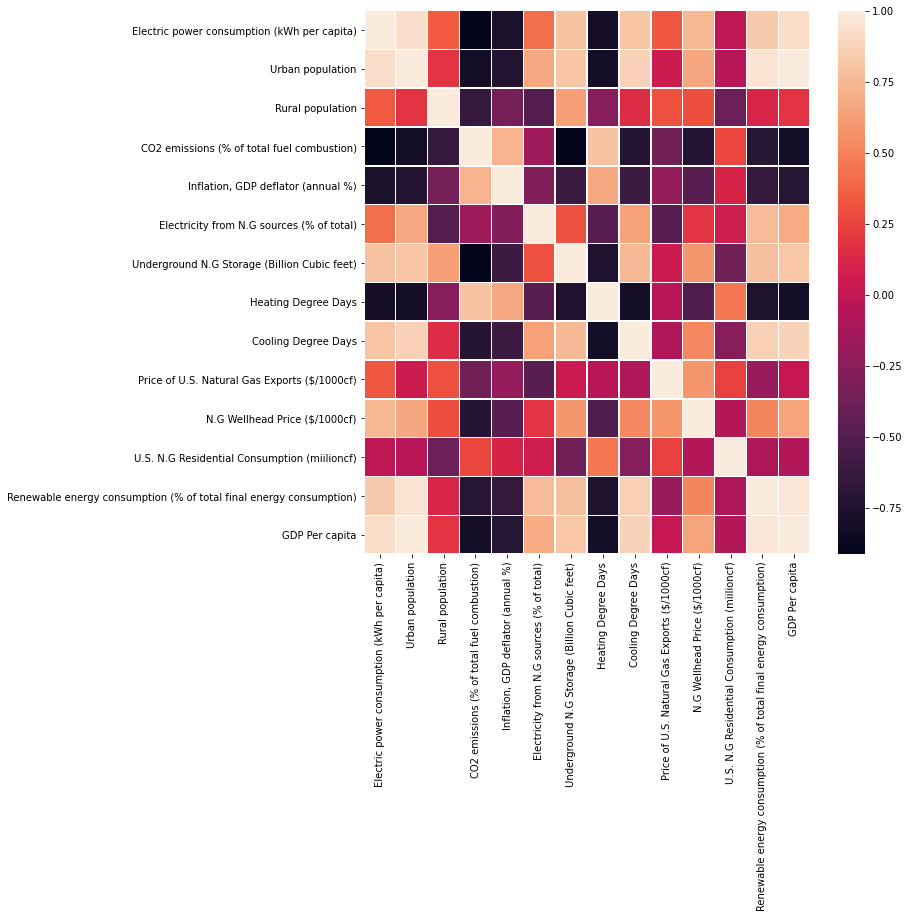

In [ ]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(), linewidths=.5, ax=ax)


In [ ]:
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Electric power consumption (kWh per capita) ::  4520.84   > nan       =>   False
Urban population ::  3666.16   > nan       =>   False
Rural population ::  2966.52   > 311.1288  =>   True
CO2 emissions (% of total fuel combustion) ::  2371.61   > 263.2603  =>   True
Inflation, GDP deflator (annual %) ::  1841.68   > 219.4051  =>   True
Electricity from N.G sources (% of total) ::  1344.51   > 179.5199  =>   True
Underground N.G Storage (Billion Cubic feet) ::  963.98    > 143.6691  =>   True
Heating Degree Days ::  649.45    > 111.7797  =>   True
Cooling Degree Days ::  398.92    > 83.9383   =>   True
Price of U.S. Natural Gas Exports ($/1000cf) ::  216.93    > 60.0627   =>   True
N.G Wellhead Price ($/1000cf) ::  108.49    > 40.1749   =>   True
U.S. N.G Residential Consumption (miilioncf) ::  24.1      > 24.2761   =>   False
Renewable energy consumption (% of total final energy consumption) ::  11

### 5. Split the data 

In [ ]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(46, 11)
(4, 11)


### 6. Check for Stationarity and Make the Time Series Stationary

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): 
        return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [ ]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Electric power consumption (kWh per capita)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7787
 No. Lags Chosen       = 1
 Critical value 1%     = -3.589
 Critical value 5%     = -2.93
 Critical value 10%    = -2.603
 => P-Value = 0.3911. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Rural population" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2408
 No. Lags Chosen       = 1
 Critical value 1%     = -3.589
 Critical value 5%     = -2.93
 Critical value 10%    = -2.603
 => P-Value = 0.1918. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CO2 emissions (% of total fuel combustion)" 

In [ ]:
# df1=df[["Urban population",
#         "Rural population",
#         "GDP Per capita",
#         "Fossil fuel energy consumption (% of total)",
#         "U.S. Natural Gas Wellhead Price  Dollars per Thousand Cubic Feet",
#         "Price of U.S. Natural Gas Imports  Dollars per Thousand Cubic Feet",
#         "Cooling Degree Days","Heating Degree Days",
#         "Electricity production from natural gas sources (% of total)",
#         "Inflation, GDP deflator (annual %)"
#         ]]

In [ ]:
#### First Differencing 
df_differenced = df.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Electric power consumption (kWh per capita)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.3844
 No. Lags Chosen       = 0
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rural population" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0519
 No. Lags Chosen       = 0
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.2643. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CO2 emissions (% of total fuel combustion)" 
    ----------------------

In [ ]:
#second differencing

# df=df_differenced[["Urban population",
#         "Rural population",
#         "GDP Per capita",
#         "Fossil fuel energy consumption (% of total)",
#         "Price of U.S. Natural Gas Imports  Dollars per Thousand Cubic Feet",
#         "Electricity production from natural gas sources (% of total)",
#         ]]

In [ ]:
#### second Differencing 
df_differenced = df_differenced.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Electric power consumption (kWh per capita)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.1752
 No. Lags Chosen       = 1
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rural population" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.0587
 No. Lags Chosen       = 0
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CO2 emissions (% of total fuel combustion)" 
    ------------------------------------------

In [ ]:
df_differenced = df_differenced.diff().dropna() #third

In [ ]:
df_differenced.drop(columns=["Price of U.S. Natural Gas Exports ($/1000cf)","Heating Degree Days"],inplace=True)

In [ ]:
df_differenced.drop(columns=["Urban population"],inplace=True)

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Electric power consumption (kWh per capita)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.1752
 No. Lags Chosen       = 1
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rural population" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.0587
 No. Lags Chosen       = 0
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CO2 emissions (% of total fuel combustion)" 
    ------------------------------------------

### 6. How to Select the Order (P) of VAR model

In [ ]:
# df_differenced.dropna(inplace=True)
df_differenced.shape

(48, 11)

In [ ]:
model = VAR(df_differenced)
for i in [1,2,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  90.48912763065294
BIC :  95.68528685247693
FPE :  2.260013832563487e+39
HQIC:  92.44447725229607 

Lag Order = 2
AIC :  86.26654387907067
BIC :  96.32407155976068
FPE :  8.633332760104203e+37
HQIC:  90.03415402753639 

Lag Order = 5
AIC :  -437.74427555284484
BIC :  -412.5140599419789
FPE :  -1.398443767518264e-193
HQIC:  -428.44015178134686 

Lag Order = 6
AIC :  -430.49503347491054
BIC :  -400.0030689826524
FPE :  -6.777438902902337e-196
HQIC:  -419.318522512414 

Lag Order = 7
AIC :  -477.9831358605487
BIC :  -442.12350578171225
FPE :  -6.584856478164351e-221
HQIC:  -464.92503569944677 

Lag Order = 8
AIC :  -487.38899184835424
BIC :  -446.0536672089156
FPE :  -4.957529916778023e-229
HQIC:  -472.4434436782038 

Lag Order = 9
AIC :  -490.40575730611994
BIC :  -443.48478779989915
FPE :  -2.8533644384770297e-234
HQIC:  -473.57091721644866 



In [ ]:
x = model.select_order(maxlags=3)
x.summary()

,AIC,BIC,FPE,HQIC
0,93.93,94.37,6.188e+40,94.09
1,90.71,96.01,2.874e+39,92.69
2,86.30,96.46,9.735e+37,90.09
3,69.13*,84.14*,1.667e+32*,74.73*


In the above output, the AIC drops to lowest at lag 4, then increases at lag 5 and then continuously drops further

### 7. Train the VAR Model of Selected Order(p)

In [ ]:
model_fitted = model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 21, May, 2020
Time:                     01:31:41
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    84.1445
Nobs:                     45.0000    HQIC:                   74.7267
Log likelihood:          -1883.78    FPE:                1.66732e+32
AIC:                      69.1291    Det(Omega_mle):     3.41554e+29
--------------------------------------------------------------------
Results for equation Electric power consumption (kWh per capita)
                                                                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   

### 8. Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

def adjust(val, length= 6): 
        return str(val).ljust(length)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))


Electric power consumption (kWh per capita) : 2.47
Rural population : 1.75
CO2 emissions (% of total fuel combustion) : 1.59
Inflation, GDP deflator (annual %) : 1.37
Electricity from N.G sources (% of total) : 1.58
Underground N.G Storage (Billion Cubic feet) : 1.27
Cooling Degree Days : 1.73
N.G Wellhead Price ($/1000cf) : 2.35
U.S. N.G Residential Consumption (miilioncf) : 2.02
Renewable energy consumption (% of total final energy consumption) : 1.71
GDP Per capita : 1.06


### 9. Forecast VAR model using statsmodels

In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

3


array([[ 2.48317000e+00, -7.20660000e+04,  0.00000000e+00,
         7.83068360e-01,  0.00000000e+00,  7.72030000e+01,
        -2.02000000e+02,  0.00000000e+00,  3.32053000e+05,
         9.43529900e-03,  9.22998340e+02],
       [ 2.51725000e+00, -7.52850000e+04,  0.00000000e+00,
        -2.72079050e-01,  0.00000000e+00, -3.92530000e+01,
         2.88000000e+02,  0.00000000e+00,  5.18144000e+05,
         9.74571900e-03,  8.42927950e+02],
       [ 2.55182000e+00,  3.41475000e+05,  0.00000000e+00,
        -5.35173070e-01,  0.00000000e+00,  8.23015000e+02,
        -2.42000000e+02,  0.00000000e+00, -5.80127000e+05,
         1.00663550e-02, -2.86665582e+03]])

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Electric power consumption (kWh per capita)_2d,Rural population_2d,CO2 emissions (% of total fuel combustion)_2d,"Inflation, GDP deflator (annual %)_2d",Electricity from N.G sources (% of total)_2d,Underground N.G Storage (Billion Cubic feet)_2d,Cooling Degree Days_2d,N.G Wellhead Price ($/1000cf)_2d,U.S. N.G Residential Consumption (miilioncf)_2d,Renewable energy consumption (% of total final energy consumption)_2d,GDP Per capita_2d
46,-1178.288022,502425.008220,-0.471298,5.317463,4.408373,1024.934146,541.124318,-7.044165,-1.210419e+06,-1.029179,-3997.138487
47,1230.805281,-150624.455836,1.445810,-0.990479,0.353003,-2008.120839,-145.966032,5.409740,1.614070e+06,0.188110,3543.945631
48,-784.598254,-492508.121636,0.393396,-4.965677,-4.180699,-581.765001,-1049.204292,1.681237,1.233788e+06,2.258219,1660.340811
49,510.787042,-131974.432265,-2.395093,-0.818967,-0.504499,1647.840757,826.979961,-1.144605,-1.999601e+06,-1.420254,-779.252565


In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=20)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

### 10. Invert the transformation to get the real forecast

In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, :]


,Electric power consumption (kWh per capita)_2d,Rural population_2d,CO2 emissions (% of total fuel combustion)_2d,"Inflation, GDP deflator (annual %)_2d",Electricity from N.G sources (% of total)_2d,Underground N.G Storage (Billion Cubic feet)_2d,Cooling Degree Days_2d,N.G Wellhead Price ($/1000cf)_2d,U.S. N.G Residential Consumption (miilioncf)_2d,Renewable energy consumption (% of total final energy consumption)_2d,GDP Per capita_2d,Electric power consumption (kWh per capita)_1d,Electric power consumption (kWh per capita)_forecast,Rural population_1d,Rural population_forecast,CO2 emissions (% of total fuel combustion)_1d,CO2 emissions (% of total fuel combustion)_forecast,"Inflation, GDP deflator (annual %)_1d","Inflation, GDP deflator (annual %)_forecast",Electricity from N.G sources (% of total)_1d,Electricity from N.G sources (% of total)_forecast,Underground N.G Storage (Billion Cubic feet)_1d,Underground N.G Storage (Billion Cubic feet)_forecast,Cooling Degree Days_1d,Cooling Degree Days_forecast,N.G Wellhead Price ($/1000cf)_1d,N.G Wellhead Price ($/1000cf)_forecast,U.S. N.G Residential Consumption (miilioncf)_1d,U.S. N.G Residential Consumption (miilioncf)_forecast,Renewable energy consumption (% of total final energy consumption)_1d,Renewable energy consumption (% of total final energy consumption)_forecast,GDP Per capita_1d,GDP Per capita_forecast
46,-1178.288022,502425.008220,-0.471298,5.317463,4.408373,1024.934146,541.124318,-7.044165,-1.210419e+06,-1.029179,-3997.138487,-999.880922,12172.487978,331846.008220,5.910107e+07,-0.471298,10.540620,4.494914,5.564255,9.462572,41.404734,1557.094146,9595.266146,730.124318,2218.124318,-7.044165,-4.384165,-1.685002e+06,2.927886e+06,-1.066552,7.650384,-2226.624057,54576.848373
47,1230.805281,-150624.455836,1.445810,-0.990479,0.353003,-2008.120839,-145.966032,5.409740,1.614070e+06,0.188110,3543.945631,230.924359,12403.412338,181221.552384,5.928229e+07,0.974512,11.515132,3.504434,9.068690,9.815576,51.220310,-451.026693,9144.239453,584.158286,2802.282603,-1.634425,-6.018590,-7.093130e+04,2.856955e+06,-0.878442,6.771942,1317.321573,55894.169946
48,-784.598254,-492508.121636,0.393396,-4.965677,-4.180699,-581.765001,-1049.204292,1.681237,1.233788e+06,2.258219,1660.340811,-553.673895,11849.738443,-311286.569252,5.897100e+07,1.367908,12.883040,-1.461242,7.607447,5.634877,56.855186,-1032.791693,8111.447760,-465.046007,2337.236596,0.046812,-5.971779,1.162857e+06,4.019812e+06,1.379777,8.151719,2977.662384,58871.832330
49,510.787042,-131974.432265,-2.395093,-0.818967,-0.504499,1647.840757,826.979961,-1.144605,-1.999601e+06,-1.420254,-779.252565,-42.886853,11806.851589,-443261.001517,5.852774e+07,-1.027185,11.855855,-2.280209,5.327239,5.130377,61.985564,615.049064,8726.496824,361.933954,2699.170551,-1.097793,-7.069572,-8.367443e+05,3.183068e+06,-0.040477,8.111242,2198.409819,61070.242149


### 11. Plot the forecast

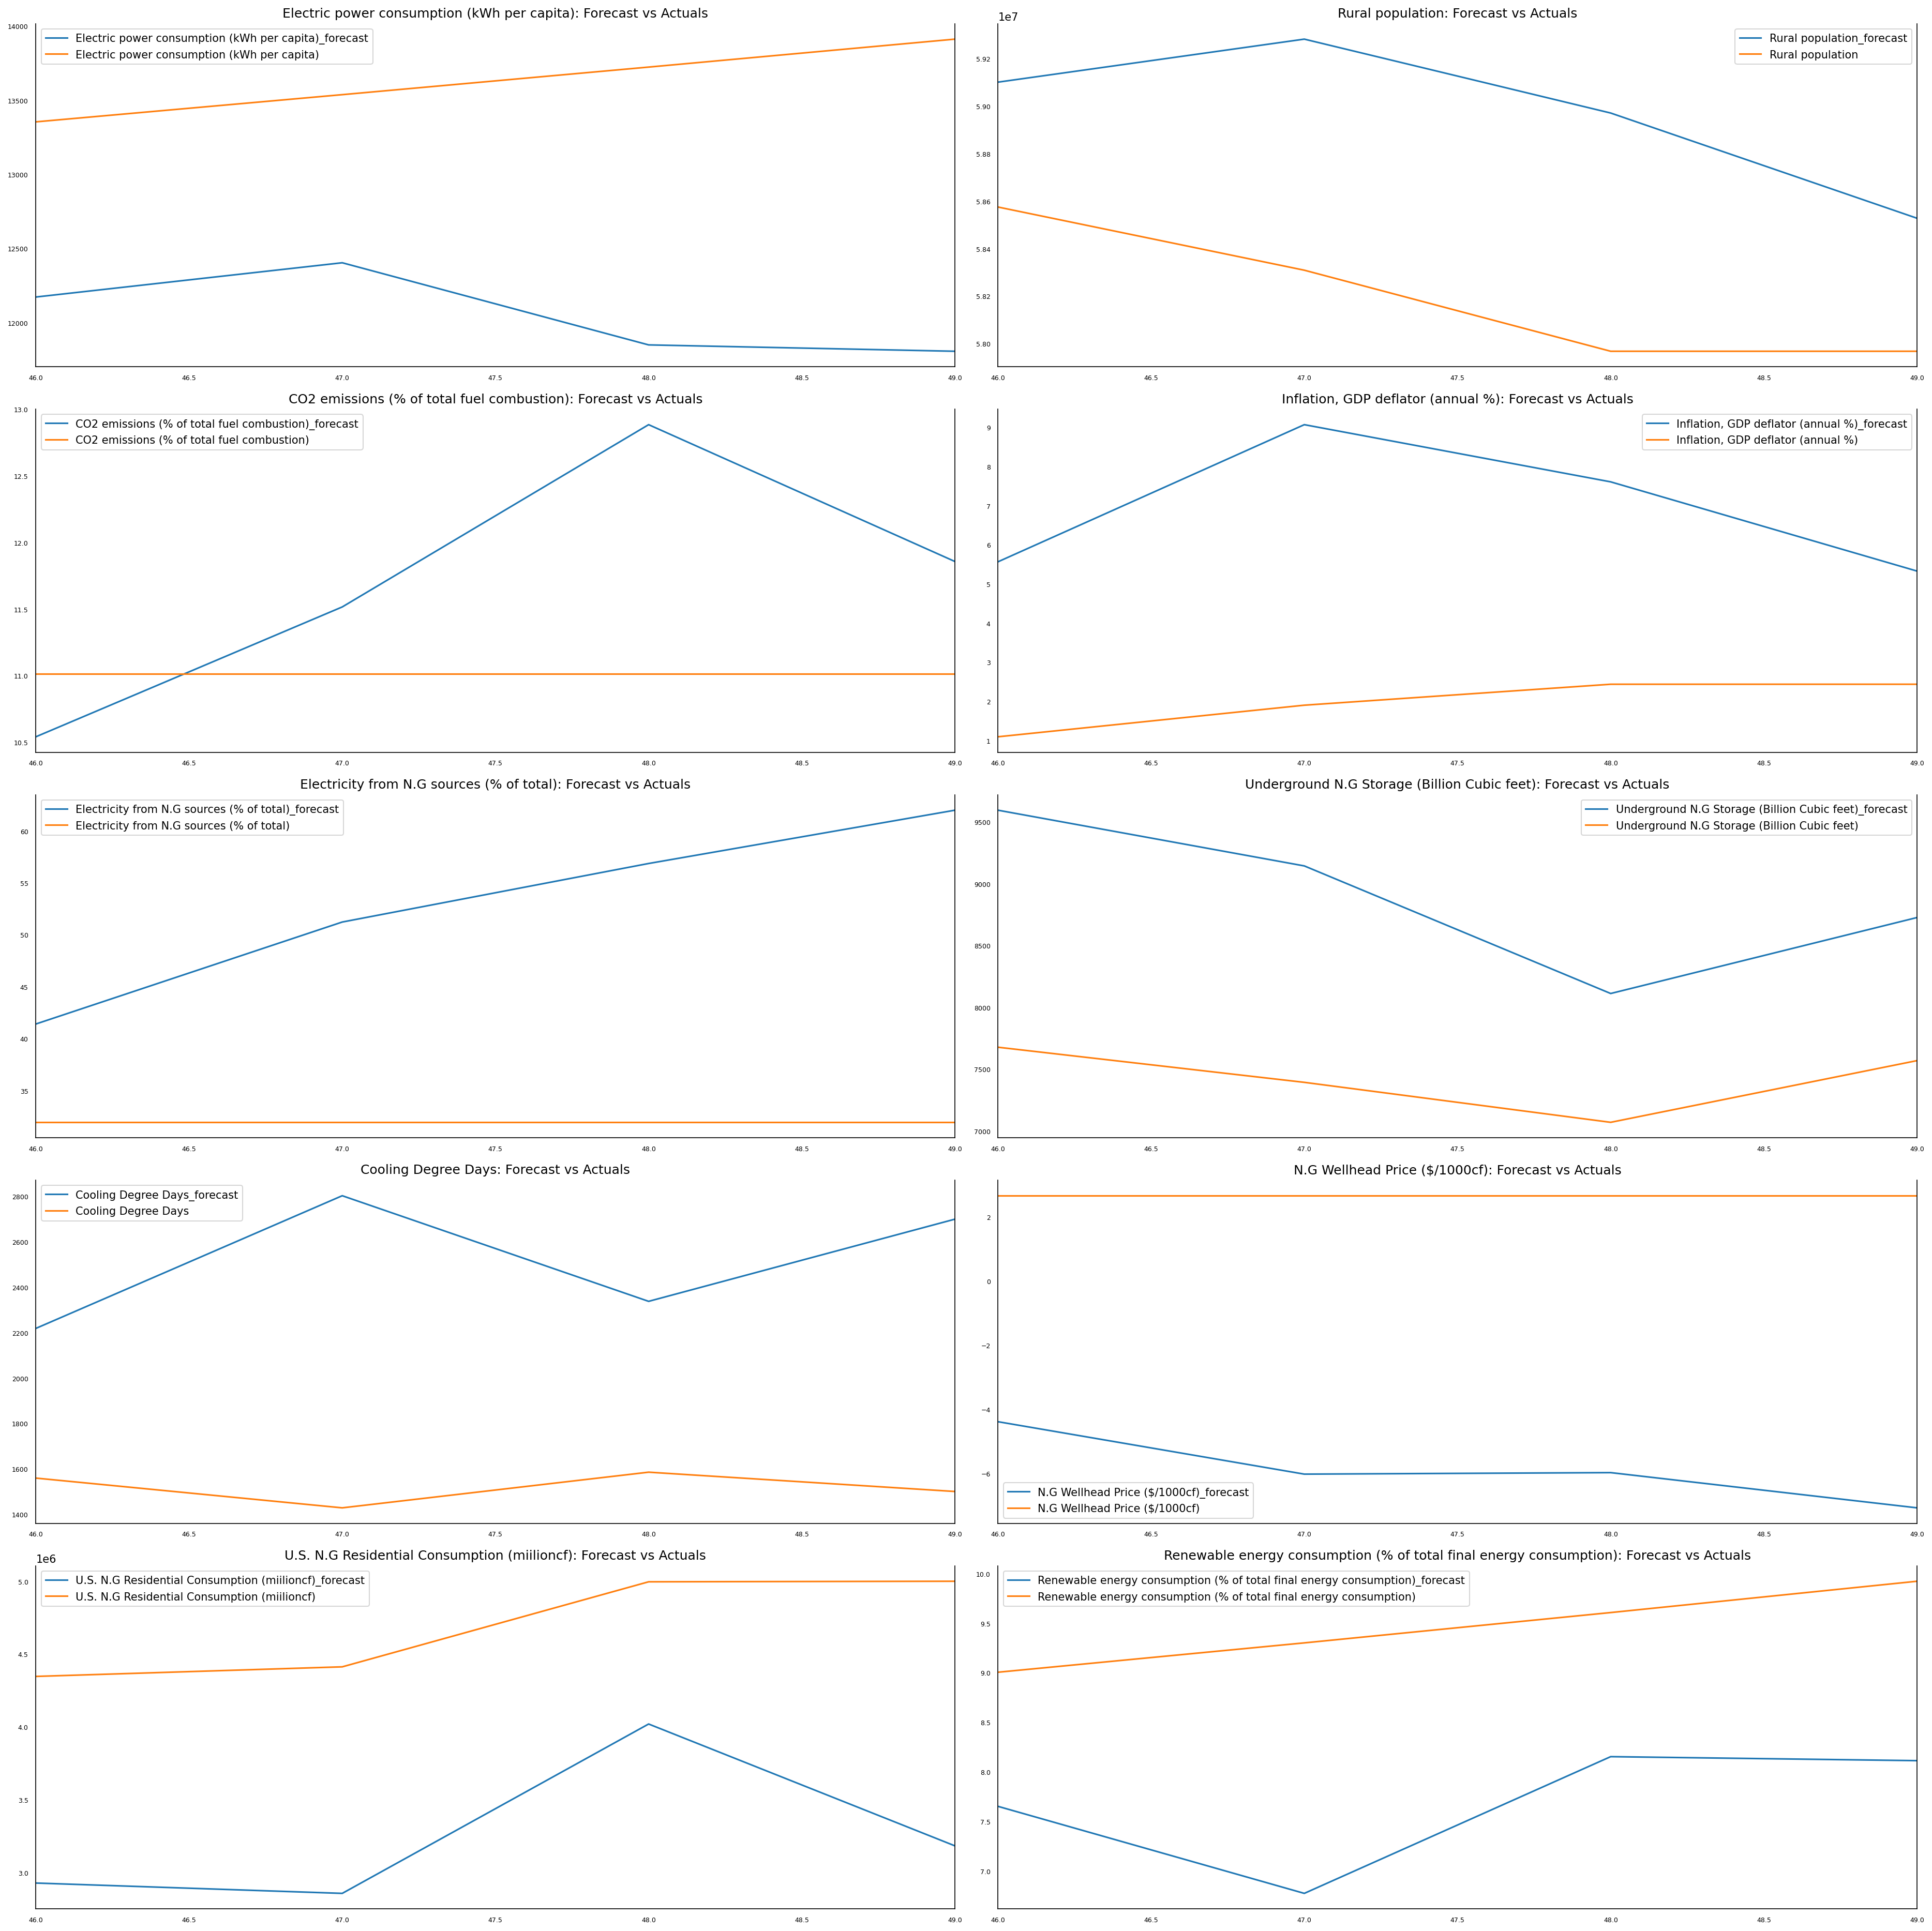

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(25,25))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();



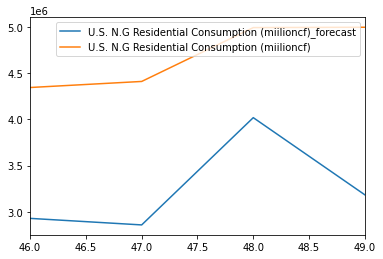

In [ ]:
df_results['U.S. N.G Residential Consumption (miilioncf)_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
df_test['U.S. N.G Residential Consumption (miilioncf)'][-nobs:].plot(legend=True)
  
  

### 12. Evaluate the forecast

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})


In [ ]:
df_test.columns

Index(['Electric power consumption (kWh per capita)', 'Rural population',
       'CO2 emissions (% of total fuel combustion)',
       'Inflation, GDP deflator (annual %)',
       'Electricity from N.G sources (% of total)',
       'Underground N.G Storage (Billion Cubic feet)', 'Cooling Degree Days',
       'N.G Wellhead Price ($/1000cf)',
       'U.S. N.G Residential Consumption (miilioncf)',
       'Renewable energy consumption (% of total final energy consumption)',
       'GDP Per capita'],
      dtype='object')

In [ ]:
for i in df.columns:
    print('Forecast Accuracy of: {}'.format(i))
    stringg =  i+"_forecast"
    accuracy_prod = forecast_accuracy(df_results[stringg].values, df_test[i])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))
    print()

Forecast Accuracy of: Electric power consumption (kWh per capita)
mape   :  0.115
me     :  -1572.6385
mae    :  1572.6385
mpe    :  -0.115
rmse   :  1628.7919
corr   :  -0.7569
minmax :  0.115

Forecast Accuracy of: Rural population
mape   :  0.0132
me     :  765807.6375
mae    :  765807.6375
mpe    :  0.0132
rmse   :  797686.4991
corr   :  0.6533
minmax :  0.013

Forecast Accuracy of: CO2 emissions (% of total fuel combustion)
mape   :  0.0838
me     :  0.6867
mae    :  0.9224
mpe    :  0.0624
rmse   :  1.0827
corr   :  nan
minmax :  0.0757

Forecast Accuracy of: Inflation, GDP deflator (annual %)
mape   :  2.7923
me     :  4.9254
mae    :  4.9254
mpe    :  2.7923
rmse   :  5.1592
corr   :  0.1827
minmax :  0.7041

Forecast Accuracy of: Electricity from N.G sources (% of total)
mape   :  0.6551
me     :  20.9243
mae    :  20.9243
mpe    :  0.6551
rmse   :  22.2736
corr   :  nan
minmax :  0.3819

Forecast Accuracy of: Underground N.G Storage (Billion Cubic feet)
mape   :  0.1969
me   

In [ ]:
1473653/df_test['U.S. N.G Residential Consumption (miilioncf)'].mean()*100

31.429256191957688

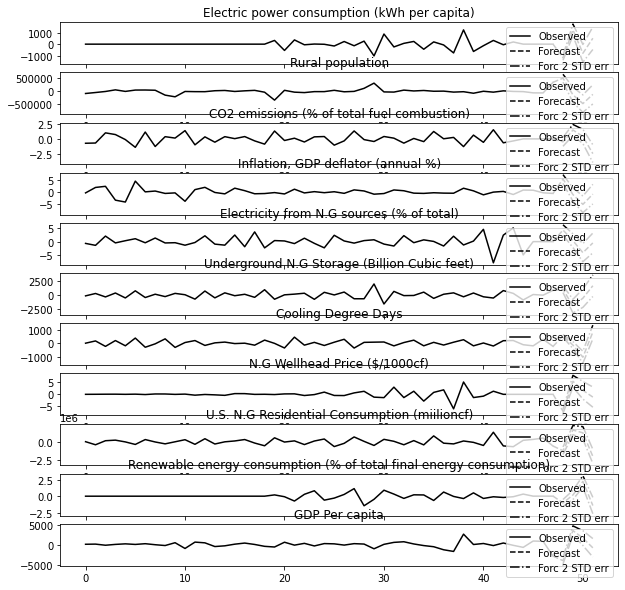

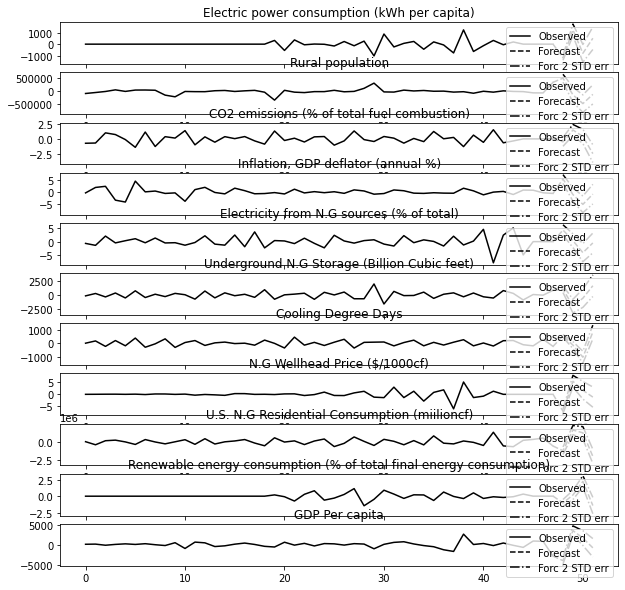

In [ ]:
model_fitted.plot_forecast(4)

In [ ]:
# Forecast
nobs = 30
fc = model_fitted.forecast(y=df_differenced.values, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Electric power consumption (kWh per capita)_2d,Urban population_2d,"Inflation, GDP deflator (annual %)_2d",Electricity production from natural gas sources (% of total)_2d,Natural Gas in Underground Storage End of Period Total Annual (Billion Cubic feet)_2d,Price of U.S. Natural Gas Imports Dollars per Thousand Cubic Feet_2d,"Electricity production from oil, gas and coal sources (% of total)_2d",U.S. Natural Gas Residential Consumption Million Cubic Feet (Y)_2d,GDP Per capita_2d
20,1692.094800,3.703928e+06,7.089031,4.155715,-1092.968071,-1.084958,-4.813516,-1.223898e+06,4264.200439
21,-6853.779417,2.550616e+05,-16.420138,7.056896,3105.919549,-2.163610,2.895033,3.612652e+06,-6583.463611
22,7499.791945,-2.618031e+06,3.540307,-29.170737,-9971.410292,13.732304,7.404932,-4.919747e+04,4463.132646
23,-75.988607,9.186621e+05,20.316057,6.477023,12115.858967,-14.332910,-4.506861,-2.254049e+06,7070.720313
24,-2984.670044,-1.968448e+06,-9.883619,49.647143,-1410.046034,-1.758897,9.724135,-4.362721e+06,-6793.107309
25,1689.612343,-2.314878e+05,-6.772365,-62.661156,-10630.872791,14.359550,-30.534755,7.928219e+06,1595.450425
26,-6973.736479,3.464857e+06,-6.448357,31.326364,7727.230206,-7.131632,15.193443,1.742076e+06,2724.756876
27,8730.657359,-2.769843e+06,-5.143417,-21.345660,-217.719280,4.096721,26.305093,-6.696408e+06,-7088.496426
28,8465.521139,1.906157e+06,35.449931,-21.125502,959.988253,-0.105962,-27.001541,-2.548982e+06,5498.362137
29,-15527.488305,2.967229e+06,0.810996,118.469476,5613.810951,-43.882353,6.814691,-3.628761e+06,-2022.144942


In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, :]


,Electric power consumption (kWh per capita)_2d,Urban population_2d,"Inflation, GDP deflator (annual %)_2d",Electricity production from natural gas sources (% of total)_2d,Natural Gas in Underground Storage End of Period Total Annual (Billion Cubic feet)_2d,Price of U.S. Natural Gas Imports Dollars per Thousand Cubic Feet_2d,"Electricity production from oil, gas and coal sources (% of total)_2d",U.S. Natural Gas Residential Consumption Million Cubic Feet (Y)_2d,GDP Per capita_2d,Electric power consumption (kWh per capita)_1d,...,Natural Gas in Underground Storage End of Period Total Annual (Billion Cubic feet)_1d,Natural Gas in Underground Storage End of Period Total Annual (Billion Cubic feet)_forecast,Price of U.S. Natural Gas Imports Dollars per Thousand Cubic Feet_1d,Price of U.S. Natural Gas Imports Dollars per Thousand Cubic Feet_forecast,"Electricity production from oil, gas and coal sources (% of total)_1d","Electricity production from oil, gas and coal sources (% of total)_forecast",U.S. Natural Gas Residential Consumption Million Cubic Feet (Y)_1d,U.S. Natural Gas Residential Consumption Million Cubic Feet (Y)_forecast,GDP Per capita_1d,GDP Per capita_forecast
20,1692.094800,3.703928e+06,7.089031,4.155715,-1092.968071,-1.084958,-4.813516,-1.223898e+06,4264.200439,1870.501896,...,-560.808071,7477.363929,-3.524958,-0.454958,-5.196768,61.881934,-1.698481e+06,2.914407e+06,6034.714869,62838.187299
21,-6853.779417,2.550616e+05,-16.420138,7.056896,3105.919549,-2.163610,2.895033,3.612652e+06,-6583.463611,-4983.277521,...,2545.111478,10022.475407,-5.688568,-6.143526,-2.301735,59.580199,1.914171e+06,4.828578e+06,-548.748742,62289.438557
22,7499.791945,-2.618031e+06,3.540307,-29.170737,-9971.410292,13.732304,7.404932,-4.919747e+04,4463.132646,2516.514424,...,-7426.298814,2596.176593,8.043736,1.900210,5.103198,64.683396,1.864974e+06,6.693551e+06,3914.383904,66203.822461
23,-75.988607,9.186621e+05,20.316057,6.477023,12115.858967,-14.332910,-4.506861,-2.254049e+06,7070.720313,2440.525817,...,4689.560152,7285.736745,-6.289173,-4.388963,0.596336,65.279732,-3.890758e+05,6.304476e+06,10985.104217,77188.926678
24,-2984.670044,-1.968448e+06,-9.883619,49.647143,-1410.046034,-1.758897,9.724135,-4.362721e+06,-6793.107309,-544.144226,...,3279.514118,10565.250863,-8.048071,-12.437034,10.320471,75.600203,-4.751797e+06,1.552679e+06,4191.996907,81380.923585
25,1689.612343,-2.314878e+05,-6.772365,-62.661156,-10630.872791,14.359550,-30.534755,7.928219e+06,1595.450425,1145.468116,...,-7351.358672,3213.892191,6.311479,-6.125555,-20.214284,55.385919,3.176422e+06,4.729101e+06,5787.447333,87168.370918
26,-6973.736479,3.464857e+06,-6.448357,31.326364,7727.230206,-7.131632,15.193443,1.742076e+06,2724.756876,-5828.268363,...,375.871534,3589.763724,-0.820153,-6.945708,-5.020841,50.365077,4.918498e+06,9.647598e+06,8512.204209,95680.575127
27,8730.657359,-2.769843e+06,-5.143417,-21.345660,-217.719280,4.096721,26.305093,-6.696408e+06,-7088.496426,2902.388996,...,158.152254,3747.915979,3.276567,-3.669141,21.284252,71.649329,-1.777910e+06,7.869689e+06,1423.707782,97104.282910
28,8465.521139,1.906157e+06,35.449931,-21.125502,959.988253,-0.105962,-27.001541,-2.548982e+06,5498.362137,11367.910136,...,1118.140507,4866.056486,3.170605,-0.498536,-5.717289,65.932040,-4.326892e+06,3.542797e+06,6922.069920,104026.352829
29,-15527.488305,2.967229e+06,0.810996,118.469476,5613.810951,-43.882353,6.814691,-3.628761e+06,-2022.144942,-4159.578170,...,6731.951458,11598.007945,-40.711748,-41.210284,1.097402,67.029442,-7.955653e+06,-4.412856e+06,4899.924978,108926.277807


### 11. Plot the forecast

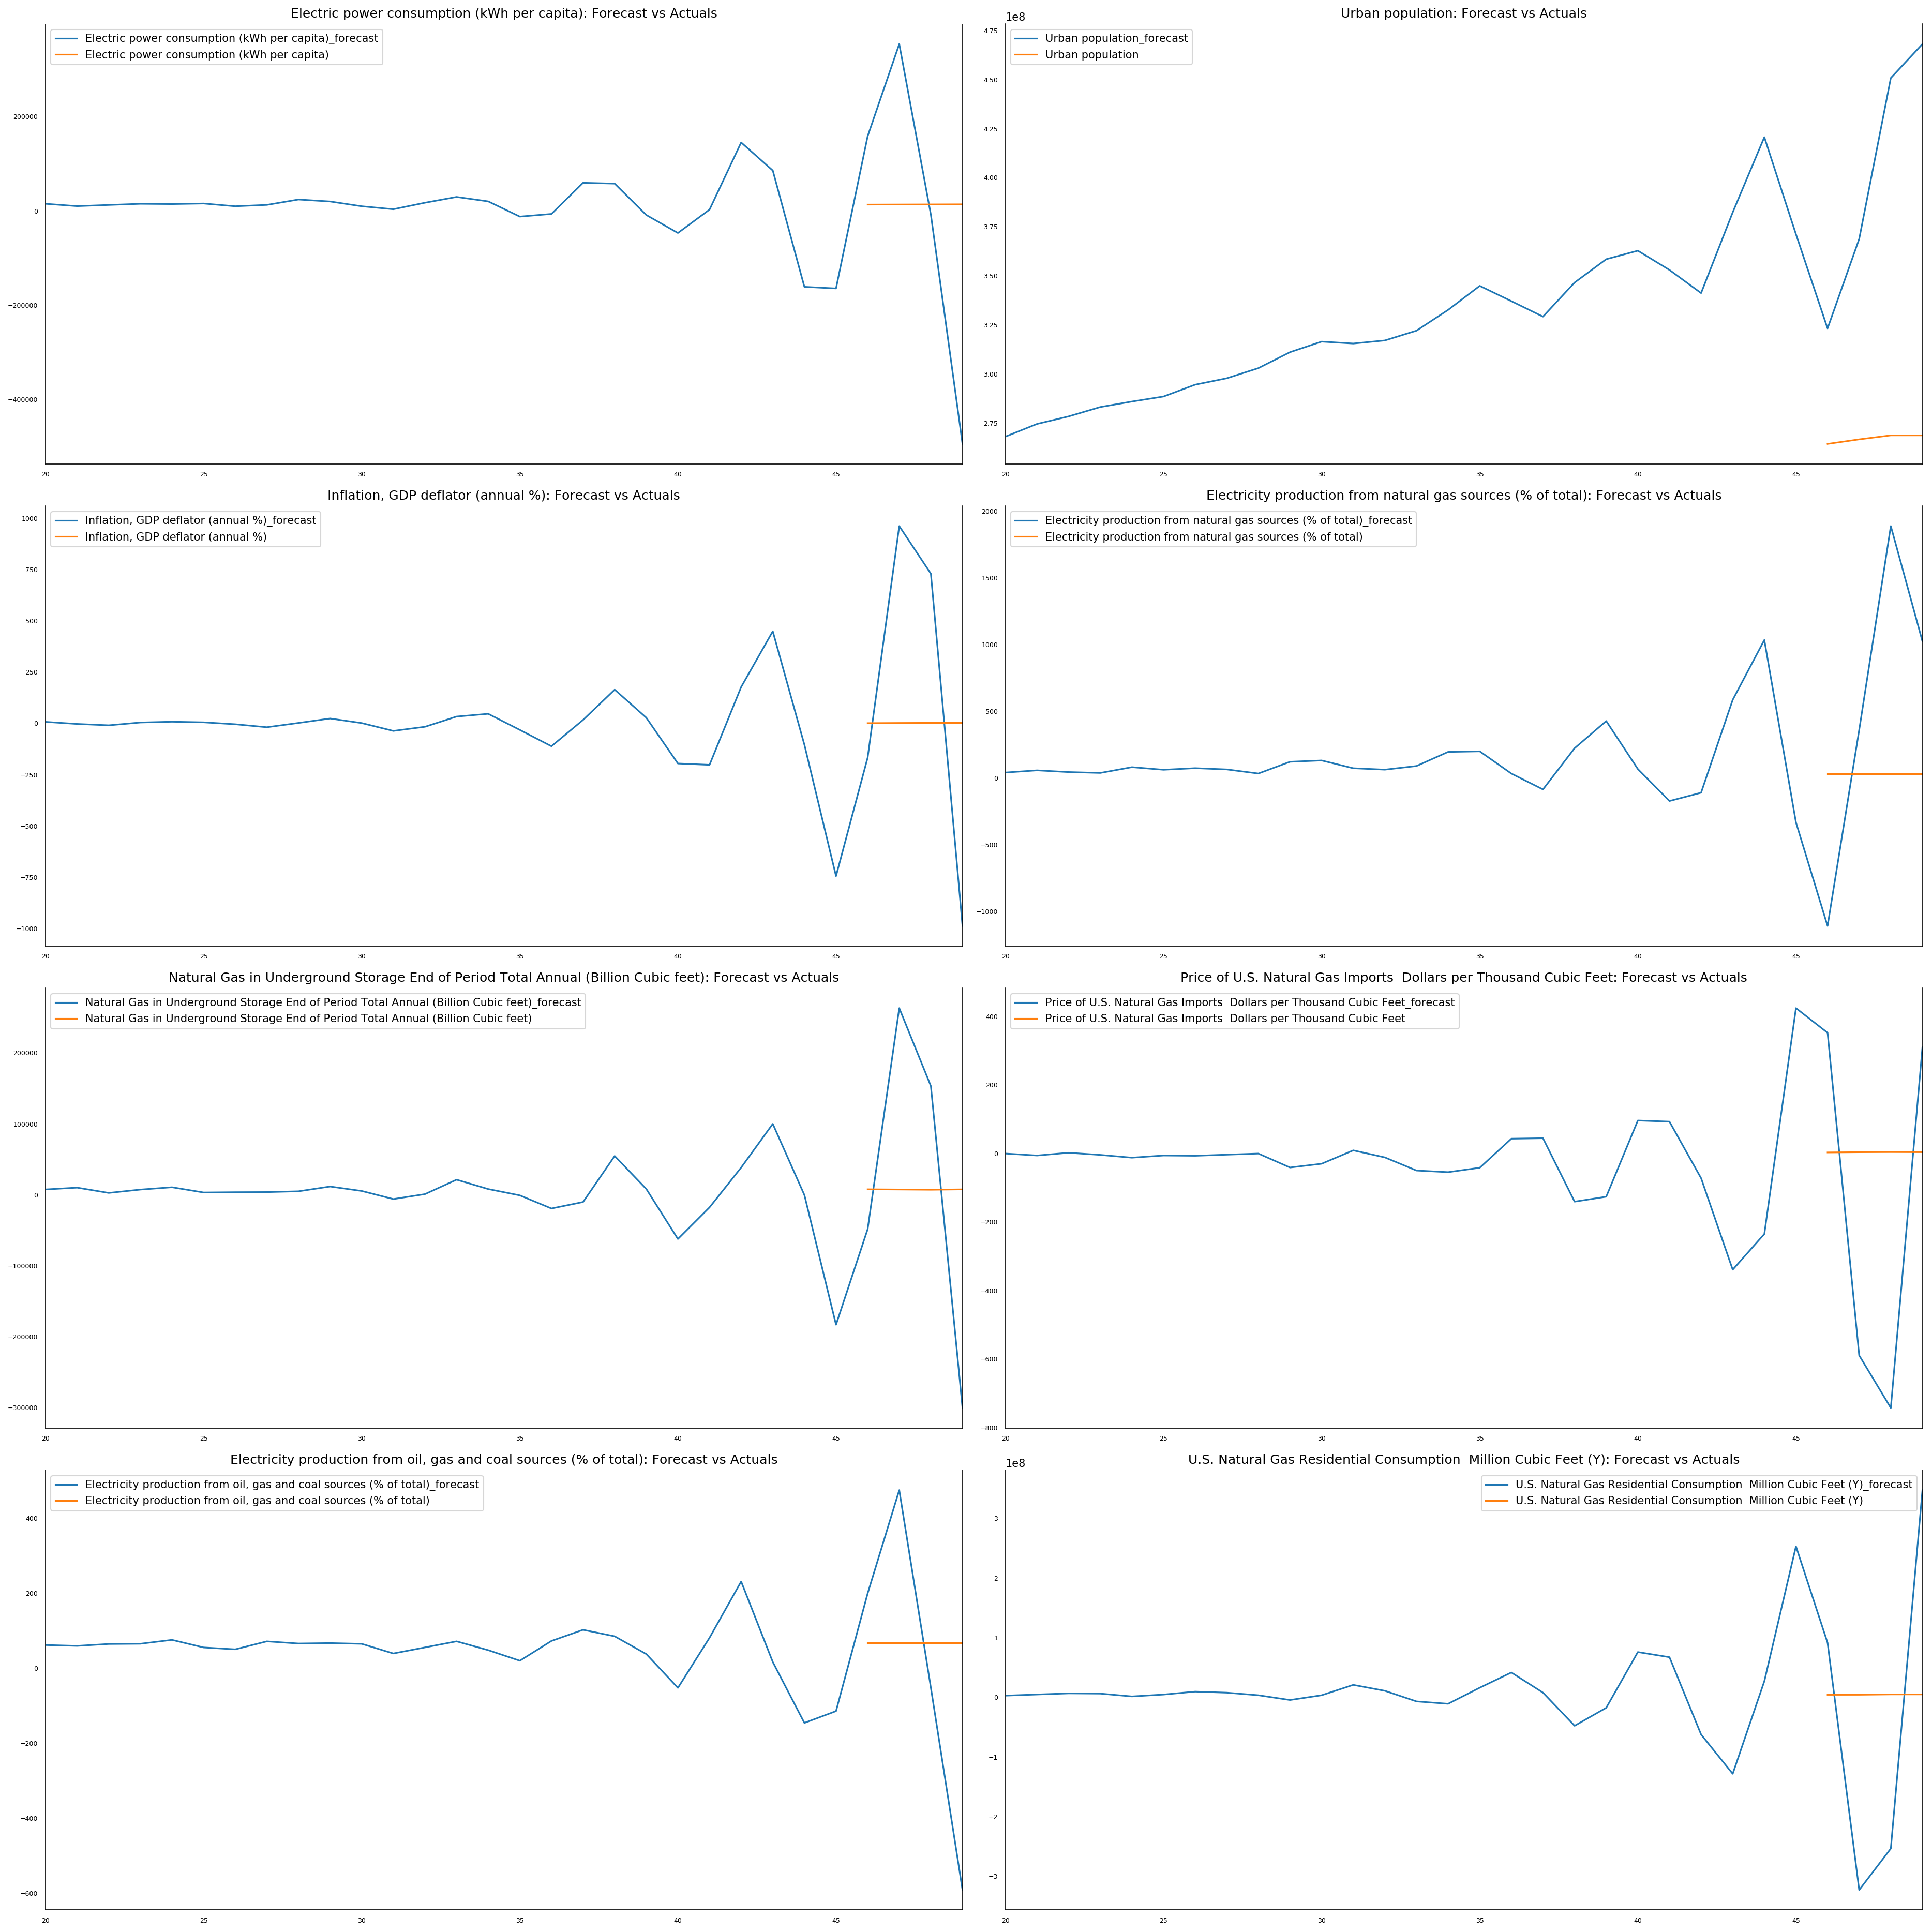

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(25,25))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
3.0395/np.mean(df_test['Electricity production from coal sources (% of total)'])

0.08878928649510685

In [ ]:
0.8255/np.mean(df_test['Inflation, GDP deflator (annual %)'])

0.4197704413006986

In [ ]:
7.1221/np.mean(df_test['Fuel imports (% of merchandise imports)'])

0.8291850154953593